### Loading and prerequesites

In [1]:
import spacy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
VARIANT = "LARGE" # "SMALL", "MEDIUM" , "FULL"

if VARIANT == "SMALL":
    df = pd.read_pickle("../Data/df_clean.pkl")
    df = df.head(30)
elif VARIANT == "MEDIUM":
    df = pd.read_pickle("../Data/df_clean.pkl")
    df = df.head(500)
else:
    df = pd.read_pickle("../Data/df_clean.pkl")

### Dictionary qual_mediaframes

In [3]:
# Create an empty dictionary
qual_mediaframes = {}

# Read the CSV file
with open("../Data/Dictionaries/qual_mediaframes.csv", "r") as f:
    # Skip the header line
    next(f)
    
    # Iterate over each line in the CSV
    for line in f:
        # Split the line by the delimiter
        columns = line.strip().split(";")
        
        # Extract the key and value
        key = columns[1]
        value = columns[0]

        # Replace whitespaces in the key with underscores
        key = key.replace(" ", "_")
        
        # Check if the key already exists in the dictionary
        if key in qual_mediaframes:
            # Append the value to the existing list
            qual_mediaframes[key].append(value)
        else:
            # Create a new list with the value
            qual_mediaframes[key] = [value]

In [4]:
print(qual_mediaframes)

{'future_orientation': ['künftige generationen', 'zukünftige herausforderungen', 'zukunft', 'ernähren', 'weltbevölkerung', 'klimaschutz', 'fridays for future', 'klimawechsel', 'treibhauseffekt', 'globale erwärmung', 'hitze', 'erwärmung', 'hunger', 'dürre', 'rodung', 'urwaldzerstörung', 'mangelernährung', 'klima', 'klimabedingungen', 'klimawandel', 'massentierhaltung'], 'globalized_economy': ['großkonzerne', 'gewinnorientierung', 'kapitalismus', 'globalisierung', 'profitmaximierung', 'monopolisierung', 'marktmacht', 'aktienkurs', 'börse', 'marktdominanz', 'saatguthersteller', 'weltmarkt'], 'environmental_issues': ['fleischerzeugung', 'fleischproduktion', 'massentierhaltung', 'flesichkonsum', 'sojabohnen', 'glyphosat', 'pflanzenschutzmittel', 'herbizide', 'bananen'], 'methodological_revolution': ['neubewertung', 'umdenken', 'trendwende', 'forschung', 'genschere', 'crispr', 'nobelpreis', 'biotechnologie', 'exakt', 'präzise', 'wissenschaft'], 'political_responsibility': ['europäische kommi

In [5]:
# Add a column in df for each key in the dictionary
for key in qual_mediaframes.keys():
    key = key.replace(" ", "_")
    df[key] = 0

# Load the German language model in Spacy
nlp = spacy.load('de_core_news_sm')

# Iterate over each row in the dataframe and count the number of times each key appears
for i, row in df.iterrows():
    # Get the text
    text = row["text"]
    
    # Create a spacy doc
    doc = nlp(text)
    
    # Iterate over each key in the dictionary
    for key in qual_mediaframes.keys():
        # Iterate over each value in the list
        for value in qual_mediaframes[key]:
            # Check if the value is in the doc
            if value in doc.text:
                # Increment the counter
                df.loc[i, key] += 1

In [8]:
df.head()

,nexis_id,title,publication_date,publication_year,publisher,text,future_orientation,globalized_economy,environmental_issues,methodological_revolution,political_responsibility,individual_concerns,preserving_tradition,negative_mobilisation
0,5MNMH621JB0GF09H0000000,Angst vor dem «harten Brexit» auf der Insel - ...,2017-01-15,2017,AP Deutsch,wenn großbritannien ende märz der ausstieg aus...,0,0,0,0,3,0,2,0
1,5SM3THB1DXFJ50MP0000000,Fleischindustrie wehrt sich gegen Marketing fü...,2018-06-21,2018,AP Deutsch,fleisch aus der labor sein noch ein zukunftsvi...,1,0,0,0,2,0,3,0
2,5SM3THB1DXFJ50MY0000000,Der AP-Überblick am Nachmittag,2018-06-21,2018,AP Deutsch,der ap weltnachrichten haben heute unter ander...,1,0,0,0,2,0,0,0
3,5STNVWH1DXFJ53VM0000000,Laborfleisch soll in drei Jahren auf die Telle...,2018-07-17,2018,AP Deutsch,maastricht ap der niederländisch unternehmen...,2,0,0,0,0,0,0,0
4,5VHK2XG1JB0GF4Y50000000,Israelische Forscher wollen künstliche Steaks ...,2019-02-26,2019,AP Deutsch,der weltbevölkerung wachsen der nachfrage nach...,2,0,1,1,0,0,4,1


In [15]:
# Create a new dataframe to store the aggregated data
yearly_data = pd.DataFrame()

# Group the dataframe by year and calculate the article and character count
yearly_data['article_count'] = df.groupby('publication_year')['text'].count()
yearly_data['character_count'] = df.groupby('publication_year')['text'].apply(lambda x: x.str.len().sum())

# Rename the column publication_year to year
yearly_data.index.names = ['year']

# Group the dataframe by year and calculate the count for each key
for key in qual_mediaframes.keys():
    yearly_data[key] = df.groupby('publication_year')[key].sum()

# Display the resulting dataframe
yearly_data

,article_count,character_count,future_orientation,globalized_economy,environmental_issues,methodological_revolution,political_responsibility,individual_concerns,preserving_tradition,negative_mobilisation
year,,,,,,,,,,
1992,3,8770,2,0,0,1,7,2,6,3
1993,6,27894,4,0,0,4,5,2,14,2
1994,18,67823,9,3,1,13,25,11,40,22
1995,20,40033,4,1,2,6,30,6,33,19
1996,29,87903,8,2,3,13,37,13,53,37
1997,49,205884,21,6,5,41,73,27,127,68
1998,61,243035,18,3,4,46,76,22,110,67
1999,98,415514,30,7,9,88,134,30,196,123
2000,100,433349,49,23,10,96,135,47,202,114


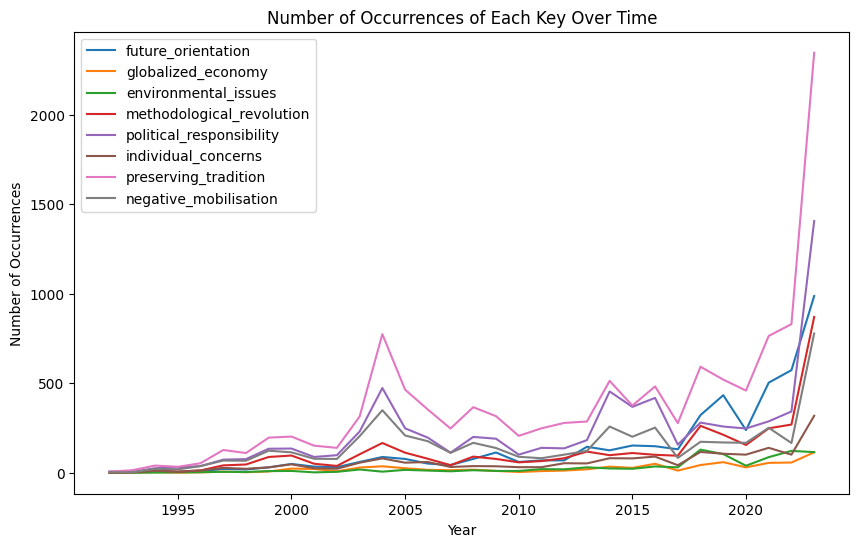

In [19]:
# Create a list of keys to plot
keys_to_plot = list(qual_mediaframes.keys())

# Create a new dataframe with only the columns of interest
plot_data = yearly_data[keys_to_plot]

# Plot the data
plot_data.plot(kind='line', figsize=(10, 6))

# Set the title and labels
plt.title('Number of Occurrences of Each Key Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Occurrences')

# Show the plot
plt.show()